# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scripts import DataHandler

# Manual

In [2]:
OR_DATA_FILE_PATH = r"C:\Users\iash.bashir\src\personal\Python\data\Design_review_10_02_2024.csv"
ROCKET_LENGTH = 2860
ALTITUDE_INCREMENTS = 1000
VERTICAL_MOTION_INCREMENTS = 50
# Columns to consider for vertical motion
VERTICAL_MOTION_COLUMNS = ['vertical_velocity', 'vertical_acceleration']

# Read CSV

In [3]:
dh = DataHandler(or_filepath=OR_DATA_FILE_PATH)
dh.rename_or_df_columns()
dh.calculate_stability_percentage(ROCKET_LENGTH)
display(dh.merged_df)

,time,altitude,vertical_velocity,vertical_acceleration,total_velocity,total_acceleration,position_east_of_launch,position_north_of_launch,lateral_distance,lateral_direction,...,reference_area,vertical_orientation_zenith,lateral_orientation_azimuth,wind_velocity,air_temperature,air_pressure,speed_of_sound,simulation_time_step,computation_time,event
0,0.010000,-0.000769,-0.046854,-4.684780,0.046854,4.684780,0.000000,0.000000,0.000000,0.000000,...,184.334834,90.000000,0.000000,2.052469,15.000000,1013.250000,340.388900,0.01,0.016397,NaN
1,0.020000,0.000907,0.055320,5.533950,0.055320,5.533950,0.000000,0.000000,0.000000,0.000000,...,184.334834,90.000000,0.000000,2.044192,14.999998,1013.249968,340.388899,0.01,0.019985,NaN
2,0.030000,0.005307,0.212866,15.757927,0.212866,15.757927,0.000000,0.000000,0.000000,0.000000,...,184.334834,90.000000,0.000000,2.035916,14.999989,1013.249810,340.388894,0.01,0.022746,NaN
3,0.040000,0.016552,0.472692,25.987130,0.472692,25.987130,0.000000,0.000000,0.000000,0.000000,...,184.334834,90.000000,0.000000,2.027639,14.999967,1013.249408,340.388880,0.01,0.025078,NaN
4,0.050000,0.038001,0.834848,36.221483,0.834848,36.221483,0.000000,0.000000,0.000000,0.000000,...,184.334834,90.000000,0.000000,2.019362,14.999925,1013.248642,340.388854,0.01,0.026794,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3967,196.820313,9.685987,-17.239582,-0.162334,27.710113,0.256287,-12383.337384,-57.079073,12383.468932,-179.735906,...,184.334834,2.384357,0.828702,2.092630,14.980810,1012.903745,340.377271,0.05,1.834467,NaN
3968,196.870313,6.857347,-17.246943,-0.132063,27.722346,0.233526,-12386.896685,-57.125103,12387.028407,-179.735769,...,184.334834,2.360163,0.829313,1.958806,14.986414,1013.004863,340.380667,0.05,1.834805,NaN
3969,196.920313,4.027624,-17.252786,-0.102053,27.733388,0.212002,-12390.457564,-57.171192,12390.589461,-179.735632,...,184.334834,2.327559,0.829924,1.841030,14.992020,1013.106020,340.384064,0.05,1.835141,NaN
3970,196.970313,1.197065,-17.257209,-0.079686,27.743267,0.196030,-12394.019965,-57.217348,12394.152038,-179.735494,...,184.334834,2.285088,0.830537,1.815465,14.997628,1013.207207,340.387463,0.05,1.835476,NaN


# Calculations

## Events Time

In [5]:
APOGEE_TIME = dh.comments_df[dh.comments_df["Event"]
                             == "APOGEE"]["Time (s)"].values[0]
BURNOUT_TIME = dh.comments_df[dh.comments_df["Event"]
                              == "BURNOUT/EJECTION_CHARGE"]["Time (s)"].values[0]

# Fonts

In [7]:
plt.rcParams.update({
    'text.usetex': False,
    'text.latex.preamble': r'\usepackage{times}',
    'font.family': 'serif',
    'font.serif': ['Times New Roman', 'Times'],
})

# Plots

## Flight Profile

In [8]:
max_altitude = dh.round_to_increment(
    dh.merged_df["altitude"], ALTITUDE_INCREMENTS, 'up')
max_vertical_motion = dh.round_to_increment(
    dh.merged_df[VERTICAL_MOTION_COLUMNS].max(), VERTICAL_MOTION_INCREMENTS, 'up')
min_vertical_motion = dh.round_to_increment(
    dh.merged_df[VERTICAL_MOTION_COLUMNS].min(), VERTICAL_MOTION_INCREMENTS, 'down')

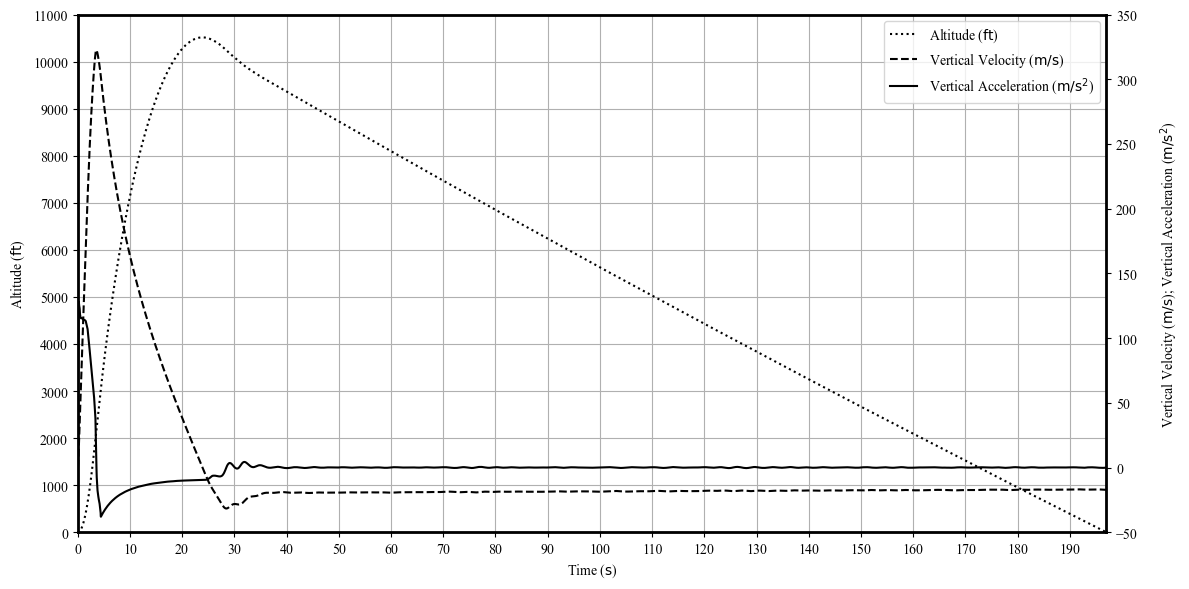

In [9]:
# Create plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Altitude
ax1.plot(dh.merged_df["time"], dh.merged_df["altitude"],
         "k:", label="Altitude ($\mathrm{ft}$)")
ax1.set_xlabel(r"Time ($\mathrm{s}$)")
ax1.set_ylabel(r"Altitude ($\mathrm{ft}$)")
ax1.set_xlim(0, dh.merged_df["time"].max())
ax1.set_ylim(0, max_altitude)
ax1.set_yticks(range(0, max_altitude + 1, ALTITUDE_INCREMENTS))
# Set x-axis ticks at regular intervals
ax1.set_xticks(np.arange(0, dh.merged_df["time"].max(), 10))
ax1.grid(True)

# Plot Vertical velocity and acceleration
ax2 = ax1.twinx()
ax2.plot(
    dh.merged_df["time"],
    dh.merged_df["vertical_velocity"],
    "k--",
    label="Vertical Velocity ($\mathrm{m/s}$)"
)
ax2.plot(
    dh.merged_df["time"],
    dh.merged_df["vertical_acceleration"],
    "k-",
    label="Vertical Acceleration ($\mathrm{m/s^2}$)"
)
ax2.set_ylabel(
    "Vertical Velocity ($\mathrm{m/s}$); Vertical Acceleration ($\mathrm{m/s^2}$)", labelpad=15
)
ax2.set_ylim(min_vertical_motion, max_vertical_motion)
ax2.set_yticks(
    np.arange(
        min_vertical_motion,
        max_vertical_motion + 1,
        VERTICAL_MOTION_INCREMENTS,
    )
)

# Change spine properties to make the border darker and thicker
for spine in ax1.spines.values():
    spine.set_edgecolor('black')  # Change color to black or any other color
    # Change the thickness. Adjust the value as needed.
    spine.set_linewidth(2)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper right")

fig.tight_layout()

# # Plot event markers
# self.plot_event_markers(ax1)

plt.show()

## Flight Profile uptil Apogee

In [10]:
temp_or_df = dh.merged_df.copy(deep=True)
temp_or_df = temp_or_df[temp_or_df["time"]
                        <= APOGEE_TIME]

max_altitude = dh.round_to_increment(
    dh.merged_df["altitude"], ALTITUDE_INCREMENTS, 'up')
max_vertical_motion = dh.round_to_increment(
    dh.merged_df[VERTICAL_MOTION_COLUMNS].max(), VERTICAL_MOTION_INCREMENTS, 'up')
min_vertical_motion = dh.round_to_increment(
    dh.merged_df[VERTICAL_MOTION_COLUMNS].min(), VERTICAL_MOTION_INCREMENTS, 'down')

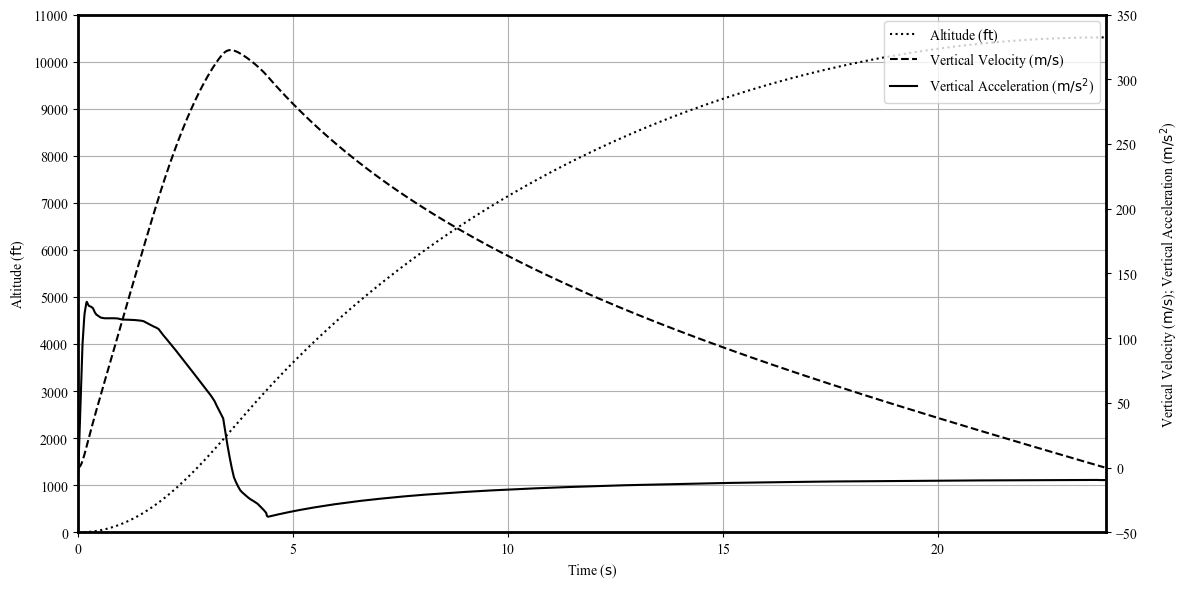

In [11]:
# Create plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Altitude
ax1.plot(temp_or_df["time"], temp_or_df["altitude"],
         "k:", label="Altitude ($\mathrm{ft}$)")
ax1.set_xlabel(r"Time ($\mathrm{s}$)")
ax1.set_ylabel(r"Altitude ($\mathrm{ft}$)")
ax1.set_xlim(0, APOGEE_TIME)
ax1.set_ylim(0, max_altitude)
ax1.set_yticks(range(0, max_altitude + 1, ALTITUDE_INCREMENTS))
# Set x-axis ticks at regular intervals
ax1.set_xticks(np.arange(0, APOGEE_TIME, 5))
ax1.grid(True)

# Plot Vertical velocity and acceleration
ax2 = ax1.twinx()
ax2.plot(
    temp_or_df["time"],
    temp_or_df["vertical_velocity"],
    "k--",
    label="Vertical Velocity ($\mathrm{m/s}$)",
)
ax2.plot(
    temp_or_df["time"],
    temp_or_df["vertical_acceleration"],
    "k-",
    label="Vertical Acceleration ($\mathrm{m/s^2}$)",
)
ax2.set_ylabel(
    "Vertical Velocity ($\mathrm{m/s}$); Vertical Acceleration ($\mathrm{m/s^2}$)", labelpad=15
)
ax2.set_ylim(min_vertical_motion, max_vertical_motion)
ax2.set_yticks(
    np.arange(
        min_vertical_motion,
        max_vertical_motion + 1,
        VERTICAL_MOTION_INCREMENTS,
    )
)

# Change spine properties to make the border darker and thicker
for spine in ax1.spines.values():
    spine.set_edgecolor('black')  # Change color to black or any other color
    # Change the thickness. Adjust the value as needed.
    spine.set_linewidth(2)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper right")

# plt.title(FLIGHT_PROFILE_PLOT_TITLE)
fig.tight_layout()

# # Plot event markers
# self.plot_event_markers(ax1)

plt.show()

## Stability vs Time (calibres)

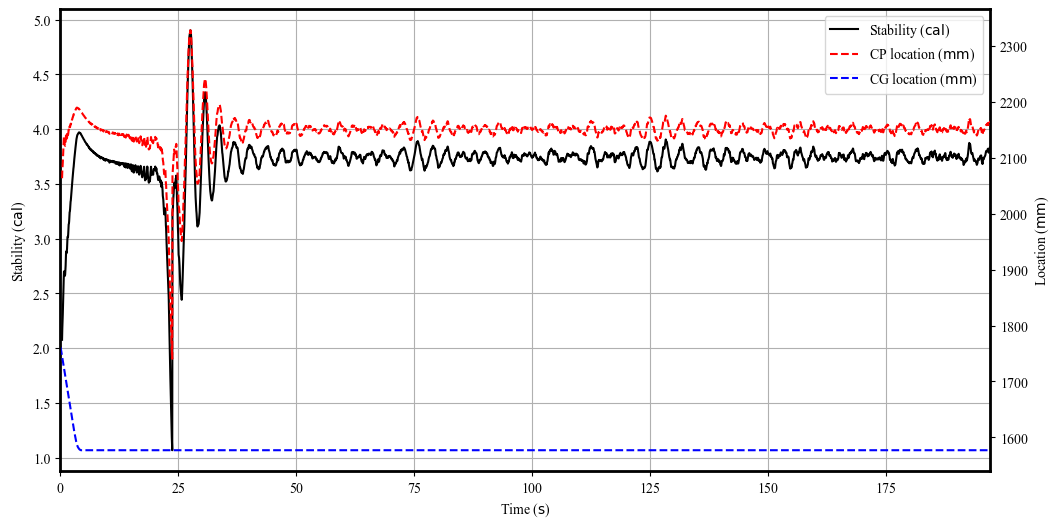

In [12]:
"""Plot Stability data."""
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(dh.merged_df["time"], dh.merged_df["stability_margin_calibers"],
         "k-", label="Stability ($\mathrm{cal}$)")

ax1.set_xlabel(r"Time ($\mathrm{s}$)")
ax1.set_ylabel(r"Stability ($\mathrm{cal}$)")
ax1.grid(True)

# Plot CP and CG location on a secondary axis
ax2 = ax1.twinx()
ax2.plot(dh.merged_df["time"], dh.merged_df["cp_location"],
         "r--", label="CP location ($\mathrm{mm}$)")
ax2.plot(dh.merged_df["time"], dh.merged_df["cg_location"],
         "b--", label="CG location ($\mathrm{mm}$)")
ax2.set_ylabel("Location ($\mathrm{mm}$)")

# Set x-axis limits based on SHOW_FULL_STABILITY_GRAPH
ax1.set_xlim(0, dh.merged_df["time"].max())

# Combine legends from ax1 and ax2
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper right")

# Change spine properties to make the border darker and thicker
for spine in ax1.spines.values():
    spine.set_edgecolor('black')  # Change color to black or any other color
    # Change the thickness. Adjust the value as needed.
    spine.set_linewidth(2)

# Plot event markers
# self.plot_event_markers(ax1)

plt.show()

## Stability vs Time till Motor Burnout (calibres)

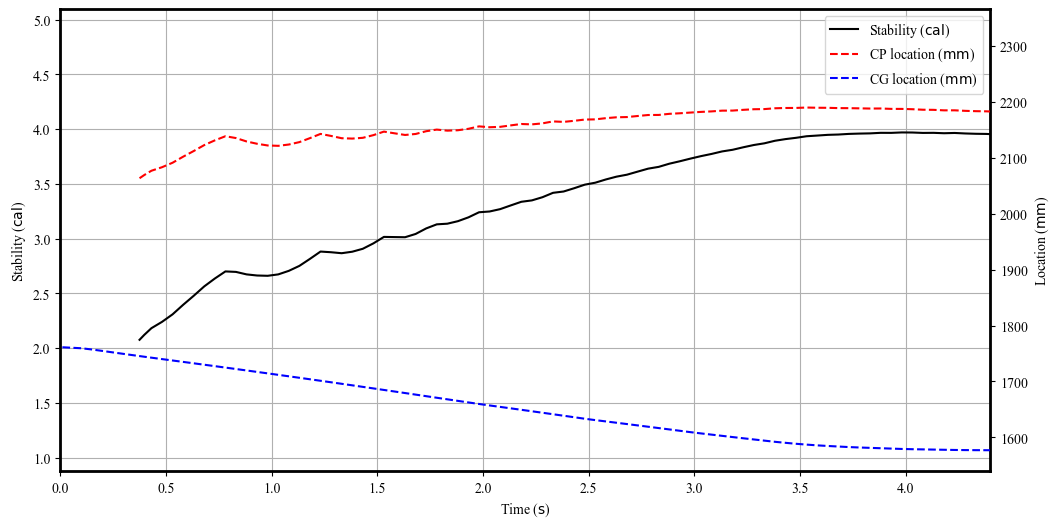

In [13]:
"""Plot Stability data."""
fig, ax1 = plt.subplots(figsize=(12, 6))

# Select y-axis data based on STABILITY_UNIT and plot
ax1.plot(dh.merged_df["time"], dh.merged_df["stability_margin_calibers"],
         "k-", label="Stability ($\mathrm{cal}$)")

ax1.set_xlabel(r"Time ($\mathrm{s}$)")
ax1.set_ylabel(r"Stability ($\mathrm{cal}$)")
ax1.grid(True)

# Plot CP and CG location on a secondary axis
ax2 = ax1.twinx()
ax2.plot(dh.merged_df["time"], dh.merged_df["cp_location"],
         "r--", label="CP location ($\mathrm{mm}$)")
ax2.plot(dh.merged_df["time"], dh.merged_df["cg_location"],
         "b--", label="CG location ($\mathrm{mm}$)")
ax2.set_ylabel("Location ($\mathrm{mm}$)")

ax1.set_xlim(0, BURNOUT_TIME)

# Combine legends from ax1 and ax2
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper right")

# Change spine properties to make the border darker and thicker
for spine in ax1.spines.values():
    spine.set_edgecolor('black')  # Change color to black or any other color
    # Change the thickness. Adjust the value as needed.
    spine.set_linewidth(2)

# Plot event markers
# self.plot_event_markers(ax1)
plt.show()

## Stability vs Time till Motor Burnout (percentage)

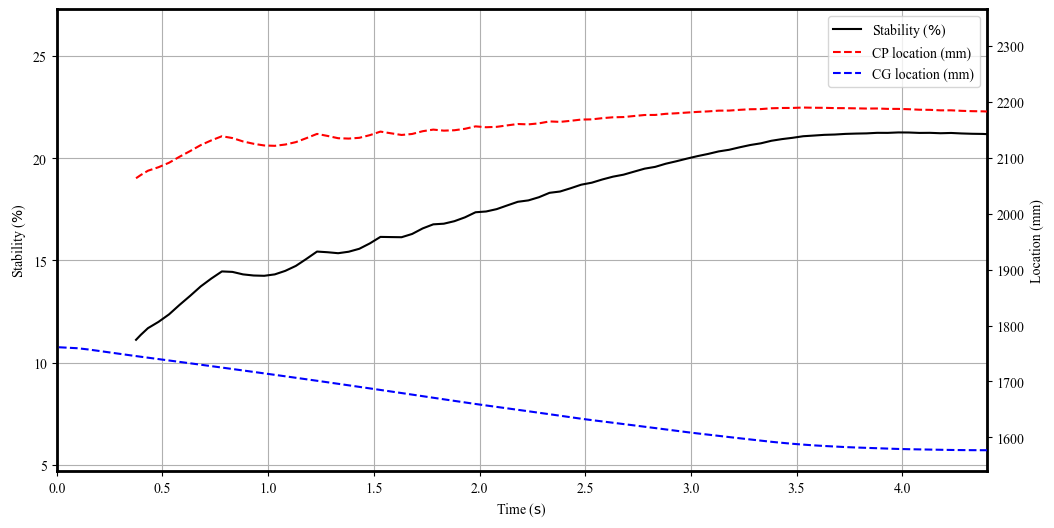

In [14]:
"""Plot Stability data."""
fig, ax1 = plt.subplots(figsize=(12, 6))

# Select y-axis data based on STABILITY_UNIT and plot
ax1.plot(dh.merged_df["time"], dh.merged_df["stability_margin_percentage"],
         "k-", label="Stability ($\mathrm{\%}$)")

ax1.set_xlabel(r"Time ($\mathrm{s}$)")
ax1.set_ylabel(r"Stability ($\mathrm{\%}$)")
ax1.grid(True)

# Plot CP and CG location on a secondary axis
ax2 = ax1.twinx()
ax2.plot(dh.merged_df["time"], dh.merged_df["cp_location"],
         "r--", label="CP location (mm)")
ax2.plot(dh.merged_df["time"], dh.merged_df["cg_location"],
         "b--", label="CG location (mm)")
ax2.set_ylabel("Location (mm)")

# Set x-axis limits based on SHOW_FULL_STABILITY_GRAPH
ax1.set_xlim(0, BURNOUT_TIME)

# Change spine properties to make the border darker and thicker
for spine in ax1.spines.values():
    spine.set_edgecolor('black')  # Change color to black or any other color
    # Change the thickness. Adjust the value as needed.
    spine.set_linewidth(2)

# Combine legends from ax1 and ax2
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper right")

# Plot event markers
# self.plot_event_markers(ax1)

plt.show()